# Week 06, Part 1

### Topic
 1. More normal distribution problems
    1. Example: Normal problem 1 - car speeds
    1. Example: Normal problem 2 - computer battery charging times
    1. Example: Normal problem 3 - test scores
 1. BACK TO SLIDES FOR BINOMIAL FORMULA


In [1]:
# resize
require(repr)
options(repr.plot.width=4, repr.plot.height=4)

Loading required package: repr


Load plot polygons previous week:

In [2]:
source('../week04/plot_polygons.R')

## 1. More normal distribution problems

#### Normal problem 1:

A radar unit is used to measure speeds of cars on a motorway. The speeds are normally distributed with a mean of 90 km/hr and a standard deviation of 10 km/hr. What is the probability that a car picked at random is traveling at more than 100 km/hr?

**Step 1:** Plot the distribution

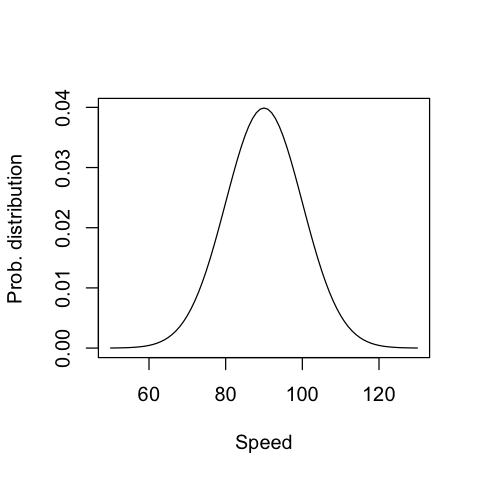

In [3]:
speeds = seq(50, 130) # km/h
distribution = dnorm(speeds, mean=90, sd=10)
plot(speeds, distribution, type='l', xlab='Speed', ylab='Prob. distribution')

**Step 2:** Plot the measurement in question

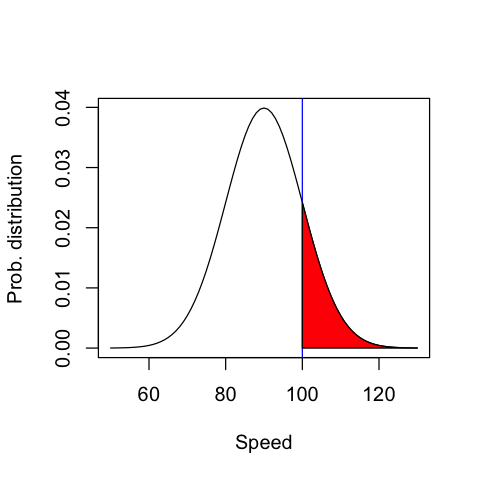

In [5]:
plot(speeds, distribution, type='l', xlab='Speed', ylab='Prob. distribution')

abline(v=100, col='blue') # draw a line at the measurement

# using the `draw_polygon` function to show the value > 100 km/hr in area
measurement = 100 # km/s & we know we want > than this value so:
x2 = seq(measurement, 130, length=100) 
y2 = dnorm(x2, mean=90, sd=10) # y-values from dnorm
draw_polygon(x2, y2)

**Step 3:** Estimate - From our plot, it looks like ~ 1/4 or 1/5 of the total area?

**Step 4:** Calculate

From the problem statement we see "probability" and "more than" this means this area since total is normalized to 1:

prob = pnorm(measurement, mean=90,sd=10)
print(prob)

We see this is ~84% which is going against our intuition $\rightarrow$ gotta use `lower.tail` flag:

In [8]:
prob = pnorm(measurement, mean=90,sd=10, lower.tail=FALSE)
print(prob)

[1] 0.1586553


**Step 5:** Check our intuition

Since 15% lines up with our rough guess from plots, this makes sense and we call this problem done!

#### Normal problem 2:
For a certain type of computers, the length of time between charges of the battery is normally distributed with a mean of 50 hours and a standard deviation of 15 hours. John owns one of these computers and wants to know the probability that the length of time will be between 50 and 70 hours.

**Step 1:** Plot the distribution

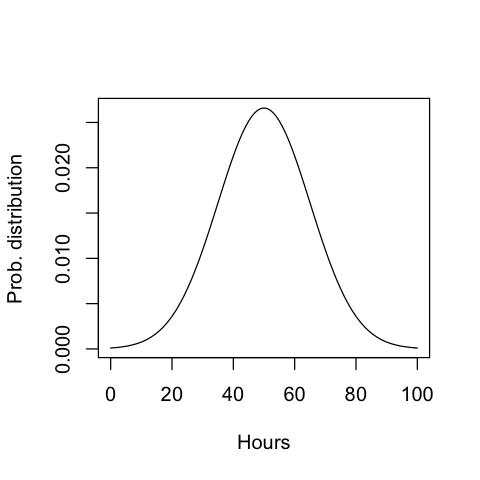

In [9]:
chargingTime = seq(0, 100) # km/h
distribution = dnorm(chargingTime, mean=50, sd=15)
plot(chargingTime, distribution, type='l', xlab='Hours', ylab='Prob. distribution')

**Step 2:** Plot the measurement in question

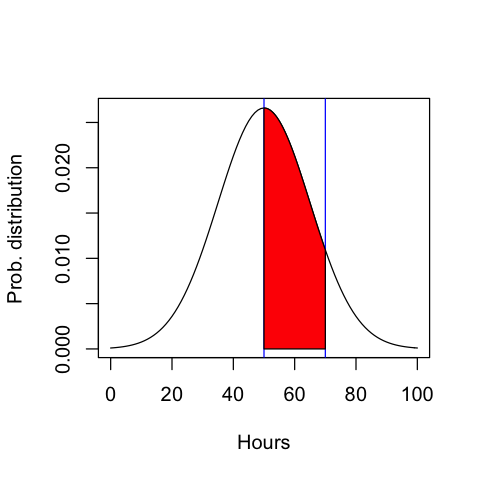

In [10]:
plot(chargingTime, distribution, type='l', xlab='Hours', ylab='Prob. distribution')

# with 2 lines:
abline(v=50, col='blue')
abline(v=70, col='blue')

# We can also use draw_polygon to show between 50 & 70
measurement1 = 50
measurement2 = 70
x2 = seq(measurement1, measurement2, length=100) 
y2 = dnorm(x2, mean=50, sd=15) # y-values from dnorm
draw_polygon(x2, y2)

**Step 3:** Estimate

From our plot, it looks like ~ 1/3 or 1/4 ish?

**Step 4:** Calculate

From the problem statement we see "probability" and "more than" this means this area since total is normalized to 1.

We'll need to subtract things to this:

In [11]:
prob1 = pnorm(measurement1, mean=50,sd=15)
prob2 = pnorm(measurement2, mean=50,sd=15)
print(prob2-prob1)

[1] 0.4087888


**Step 5:** Check our intuition

Since ~40% looks like what our estimate was, let's consider this problem done!

#### Normal problem 3:

Entry to a certain University is determined by a national test.  The scores on this test are normally distributed with a mean of 500 and a standard deviation of 100. Tom wants to be admitted to this university and he knows that he must score better than at least 70% of the students who took the test. Tom takes the test and scores 585. Will he be admitted to this university?

**Step 1:** Plot the distribution

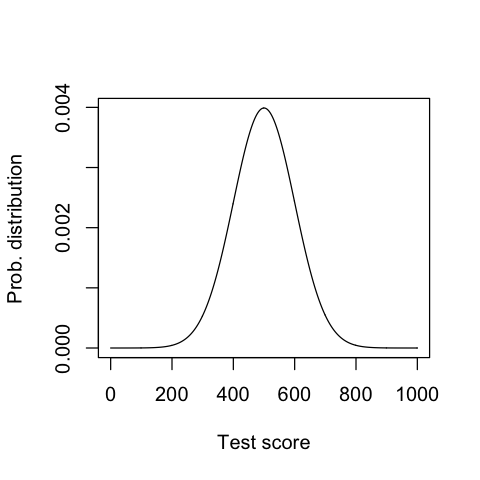

In [12]:
scores = seq(0, 1000) 
distribution = dnorm(scores, mean=500, sd=100)
plot(scores, distribution, type='l', xlab='Test score', ylab='Prob. distribution')

**Step 2:** Plot the measurement in question

First: we'll plot the 70th percentile, to do that, we have to find the zscore corresponding to the 70th percentile using "qnorm":

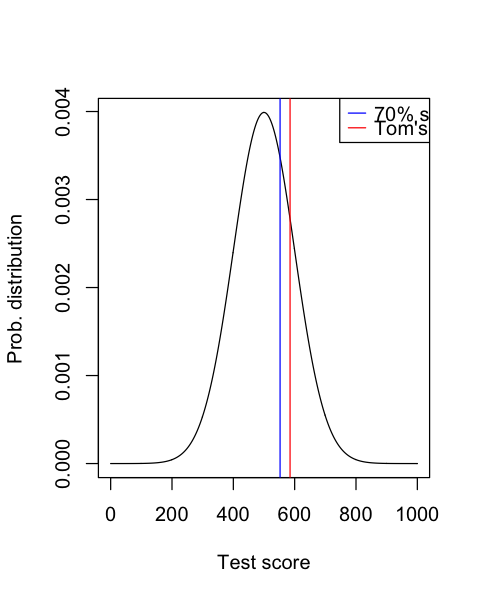

In [17]:
options(repr.plot.width=4, repr.plot.height=5) # nicer plot

plot(scores, distribution, type='l', xlab='Test score', ylab='Prob. distribution')

Zscore70 = qnorm(0.70, mean=500, sd=100) # calculate the Z-score of 70th percentile
abline(v=Zscore70, col="blue") # draw

abline(v=585, col="red") # plot Tom's score
legend("topright", c("70% score", "Tom's score"), col=c("blue","red"), lw=1)

**Step 3:** Estimate

It looks like tom's score > 70th percentile zscore so he should be in!

**Step 4:** Calculate

We essentially already did this, but let's just print this:

In [16]:
print(Zscore70) # 552 < 585

[1] 552.4401


Note: could also do: `ZscoreTom = (585-500)/100`, `pnorm(0.85, mean=0, sd=1)` = 0.80, so Tom gets 80.2% on the test > 70%


# BACK TO SLIDES FOR BINOMIAL FORMULA